#Machine Learning and FinTech 2024/25
##Homework 1028 reference answer
By TA, Chan Nok Hang

| Name  | HW CODE  | Question                                            |
|-------|----------|-----------------------------------------------------|
| Roy   | HW1029Q1 | Ch04_Q13(e,f,g,h,i,j) in page 197 (Logistic Regression) |
| Ethan | HW1029Q2 | Ch04_Q2 in page 193 (LDA)                           |
| Jack  | HW1029Q3 | Ch04_Q6 in page 195 (Logistic Regression)           |
| Simon | HW1029Q4 | Ch04_Q14 in page 197 (ALL)                          |
| Lynn  | HW1029Q5 | Ch04_Q15 in page 198 (ALL)                          |

#Ch4_Q13 part e-j:
13. This question should be answered using the Weekly data set, which
 is part of the ISLP package. This data is similar in nature to the
 Smarket data from this chapter’s lab, except that it contains 1,089
 weekly returns for 21 years, from the beginning of 1990 to the end of
 2010.

##(e)
Repeat (d) using LDA.


In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 73.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=ef0b7d40df530fa5a79c322beeebf9f70251badc9ea0ba33c4ced62c02798f90
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [ ]:
import pandas as pd
from ISLP import load_data
from ISLP import confusion_table
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load the "Weekly" dataset
weekly = load_data('Weekly')

# Create a binary response variable (1 for "Up," 0 for "Down")
weekly['Direction_binary'] = (weekly['Direction'] == 'Up').astype(int)

# Define the training and testing data periods
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] >= 2009]

# Select the "Lag2" variable as the predictor for LDA
X_train = train_data[['Lag2']]
y_train = train_data['Direction_binary']

X_test = test_data[['Lag2']]
y_test = test_data['Direction_binary']

# Fit the LDA model using only "Lag2" as the predictor
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Predict using the test data
lda_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(lda_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, lda_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")


Confusion Matrix:
Truth       0   1
Predicted        
0           9   5
1          34  56
Overall Fraction of Correct Predictions: 0.6250


##(f)
Repeat (d) using QDA.


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Fit the QDA model using only "Lag2" as the predictor
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Predict using the test data
qda_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(qda_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, qda_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0           0   0
1          43  61
Overall Fraction of Correct Predictions: 0.5865


##(g)
Repeat (d) using KNN with K = 1.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNN model with K=1 using only "Lag2" as the predictor
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Predict using the test data
knn_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(knn_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, knn_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          22  32
1          21  29
Overall Fraction of Correct Predictions: 0.4904


##(h)
Repeat (d) using naive Bayes.


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Fit the Naive Bayes model using Gaussian Naive Bayes with only "Lag2" as the predictor
model = GaussianNB()
model.fit(X_train, y_train)

# Predict using the test data
gnb_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(gnb_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, gnb_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0           0   0
1          43  61
Overall Fraction of Correct Predictions: 0.5865


##(i)
Which of these methods appears to provide the best results on
this data?


To answer the question of which method provide the best results on the data, we can use the accuracy as a standard. According to the calculated accuracy on each method, we can said that the **Linear Discriminant Analysis** method is providing the best results on the data, as it have a highest **0.6250** accuracy.

##(j)
Experiment with diferent combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifer.

###Load data and do train-test split

In [ ]:
import pandas as pd
from ISLP import load_data
from ISLP import confusion_table
from sklearn.metrics import accuracy_score

# Load the "Weekly" dataset
weekly = load_data('Weekly')

# Create a binary response variable (1 for "Up," 0 for "Down")
weekly['Direction_binary'] = (weekly['Direction'] == 'Up').astype(int)

# Define the training and testing data periods
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] >= 2009]

# Select the "Lag2" variable as the predictor for LDA
X_train = train_data[['Lag2']]
y_train = train_data['Direction_binary']

X_test = test_data[['Lag2']]
y_test = test_data['Direction_binary']

###Logistic Regression:

Origin accuracy 0.5481

In [ ]:
# Define the training and testing data periods
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] >= 2009]

# Select the "Lag2" variable as the predictor for the model
X_train = train_data[['Lag2']]
y_train = train_data['Direction_binary']

X_test = test_data[['Lag2']]
y_test = test_data['Direction_binary']

# Add a constant to the predictors (intercept)
x_train = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the logistic regression results
print(result.summary())

# Predict using the test data
y_pred = result.predict(X_test)>0.5 # Set a threshold of 0.5 for binary classification

# Compute the confusion matrix
confusion = confusion_table(y_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Direction_binary   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:               -0.004340
Time:                        08:29:47   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0629      0.029      2.192      0.028       0.007       0.119
Confusion Matrix:
Truth      

Add Today as predictors: New accuracy 1.0000

In [ ]:
from sklearn.linear_model import LogisticRegression

# Add Today as predictors
X_train = train_data[['Today', 'Lag2']]
X_test = test_data[['Today', 'Lag2']]

# Fit the logistic regression model with the new predictors
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict using the test data
y_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(y_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Logistic Regression with Interaction Term - Results:")
print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Logistic Regression with Interaction Term - Results:
Confusion Matrix:
Truth       0   1
Predicted        
0          43   0
1           0  61
Overall Fraction of Correct Predictions: 1.0000


Add Today and the interaction term (Lag1 * Lag2) as predictors: New accuracy 1.0000

In [ ]:
from sklearn.linear_model import LogisticRegression

# Add Today and the interaction term (Lag1 * Lag2) as predictors
X_train = train_data[['Today', 'Lag2']]
X_train['Lag1_Lag2_interaction'] = train_data['Lag1'] * train_data['Lag2']

X_test = test_data[['Today', 'Lag2']]
X_test['Lag1_Lag2_interaction'] = test_data['Lag1'] * test_data['Lag2']

# Fit the logistic regression model with the new predictors
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict using the test data
y_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(y_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Logistic Regression with Interaction Term - Results:")
print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Logistic Regression with Interaction Term - Results:
Confusion Matrix:
Truth       0   1
Predicted        
0          43   0
1           0  61
Overall Fraction of Correct Predictions: 1.0000


<ipython-input-15-558c2532963e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Lag2_Lag3_interaction'] = train_data['Lag1'] * train_data['Lag2']
<ipython-input-15-558c2532963e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Lag2_Lag3_interaction'] = test_data['Lag1'] * test_data['Lag2']


###Linear Discriminant Analysis (LDA):

Original LDA(part e) accuracy: 0.6250

Add Today as predictors: 0.9615

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Add Today as predictors
X_train_lda = train_data[['Today', 'Lag2']]
X_test_lda = test_data[['Today', 'Lag2']]

# Fit the LDA model with the new predictors
model = LinearDiscriminantAnalysis()
model.fit(X_train_lda, y_train)

# Predict using the test data
lda_pred = model.predict(X_test_lda)

# Compute the confusion matrix
confusion = confusion_table(lda_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, lda_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          39   0
1           4  61
Overall Fraction of Correct Predictions: 0.9615


Add Today and the interaction term (Lag1 * Lag2) as predictors: 0.9615

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Add Today and the interaction term (Lag1 * Lag2) as predictors
X_train_lda = train_data[['Today', 'Lag2']]
X_train_lda['Lag1_Lag2_interaction'] = train_data['Lag1'] * train_data['Lag2']

X_test_lda = test_data[['Today', 'Lag2']]
X_test_lda['Lag1_Lag2_interaction'] = test_data['Lag1'] * test_data['Lag2']


# Fit the LDA model with the new predictors
model = LinearDiscriminantAnalysis()
model.fit(X_train_lda, y_train)

# Predict using the test data
lda_pred = model.predict(X_test_lda)

# Compute the confusion matrix
confusion = confusion_table(lda_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, lda_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          39   0
1           4  61
Overall Fraction of Correct Predictions: 0.9615


<ipython-input-13-d947f9604bd3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_lda['Lag2_Lag3_interaction'] = train_data['Lag1'] * train_data['Lag2']
<ipython-input-13-d947f9604bd3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_lda['Lag2_Lag3_interaction'] = test_data['Lag1'] * test_data['Lag2']


###Quadratic Discriminant Analysis (QDA):

The Original QDA(part f) accuracy is 0.5865, after trying to add Today or both Today and the interaction term (Lag1 * Lag2) as predictors, both of their accuracy increases. Adding Today improve the accuracy to 0.9808, and if also adding the lag1_lag2 interaction term, the accuracy decrease to 0.9615.

After add Today as predictors, accuracy change to: 0.9808

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Try using Today and Lag2 as predictors
X_train_qda = train_data[['Today', 'Lag2']]
X_test_qda = test_data[['Today', 'Lag2']]

# Fit the LDA model with the new predictors
model = QuadraticDiscriminantAnalysis()
model.fit(X_train_qda, y_train)

# Predict using the test data
qda_pred = model.predict(X_test_qda)

# Compute the confusion matrix
confusion = confusion_table(qda_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, qda_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          41   0
1           2  61
Overall Fraction of Correct Predictions: 0.9808


Add Today and the interaction term (Lag1 * Lag2) as predictors: 0.9615

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Add Today and the interaction term (Lag1 * Lag2) as predictors
X_train_qda = train_data[['Today', 'Lag2']]
X_train_qda['Lag1_Lag2_interaction'] = train_data['Lag1'] * train_data['Lag2']

X_test_qda = test_data[['Today', 'Lag2']]
X_test_qda['Lag1_Lag2_interaction'] = test_data['Lag1'] * test_data['Lag2']

# Fit the LDA model with the new predictors
model = QuadraticDiscriminantAnalysis()
model.fit(X_train_qda, y_train)

# Predict using the test data
qda_pred = model.predict(X_test_qda)

# Compute the confusion matrix
confusion = confusion_table(qda_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, qda_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          41   2
1           2  59
Overall Fraction of Correct Predictions: 0.9615


<ipython-input-10-4e35179b9cf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_qda['Lag2_Lag3_interaction'] = train_data['Lag1'] * train_data['Lag2']
<ipython-input-10-4e35179b9cf3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_qda['Lag2_Lag3_interaction'] = test_data['Lag1'] * test_data['Lag2']


###K-Nearest Neighbors (KNN):

The accuracy of k=1 is 0.4904 according to part g. After testing for k=3,5,7, when k=3 it provide highest accuracy of 0.5577.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNN model with K=3 using only "Lag2" as the predictor
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict using the test data
knn_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(knn_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, knn_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          16  19
1          27  42
Overall Fraction of Correct Predictions: 0.5577


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNN model with K=5 using only "Lag2" as the predictor
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict using the test data
knn_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(knn_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, knn_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          16  21
1          27  40
Overall Fraction of Correct Predictions: 0.5385


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNN model with K=7 using only "Lag2" as the predictor
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

# Predict using the test data
knn_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_table(knn_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, knn_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          16  20
1          27  41
Overall Fraction of Correct Predictions: 0.5481


###Naive Bayes:

The original accuracy in part h is 0.5865, after trying to add Today or both Today and the interaction term (Lag1 * Lag2) as predictors, both of their accuracy increases. Adding Today as predictors, the accuracy change to 0.9615, and if also adding the lag1_lag2 interaction term, the accracy further improve to 0.9904.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Try using Today and Lag2 as predictors
X_train_gnb = train_data[['Today', 'Lag2']]
X_test_gnb = test_data[['Today', 'Lag2']]

# Fit the Naive Bayes model using Gaussian Naive Bayes with only "Lag2" as the predictor
model = GaussianNB()
model.fit(X_train_gnb, y_train)

# Predict using the test data
gnb_pred = model.predict(X_test_gnb)

# Compute the confusion matrix
confusion = confusion_table(gnb_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, gnb_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          39   0
1           4  61
Overall Fraction of Correct Predictions: 0.9615


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Add Today and the interaction term (Lag1 * Lag2) as predictors
X_train_gnb = train_data[['Today', 'Lag2']]
X_train_gnb['Lag1_Lag2_interaction'] = train_data['Lag1'] * train_data['Lag2']

X_test_gnb = test_data[['Today', 'Lag2']]
X_test_gnb['Lag1_Lag2_interaction'] = test_data['Lag1'] * test_data['Lag2']
# Fit the Naive Bayes model using Gaussian Naive Bayes with only "Lag2" as the predictor
model = GaussianNB()
model.fit(X_train_gnb, y_train)

# Predict using the test data
gnb_pred = model.predict(X_test_gnb)

# Compute the confusion matrix
confusion = confusion_table(gnb_pred, y_test)

# Compute the overall fraction of correct predictions (accuracy)
accuracy = accuracy_score(y_test, gnb_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Overall Fraction of Correct Predictions: {accuracy:.4f}")

Confusion Matrix:
Truth       0   1
Predicted        
0          42   0
1           1  61
Overall Fraction of Correct Predictions: 0.9904


<ipython-input-13-d3afedc95ba4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_gnb['Lag1_Lag2_interaction'] = train_data['Lag1'] * train_data['Lag2']
<ipython-input-13-d3afedc95ba4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_gnb['Lag1_Lag2_interaction'] = test_data['Lag1'] * test_data['Lag2']


### Conclusion:
After experimenting with different methods and according to the result, whether add Today or both today and the interaction term (Lag1 * Lag2) as predictors, it increases the accuracy of the model to 1.0000. In this case, as both combinations of predictors can max out the accuracy, to judge which appears to provide the best results on the held out data, we can consider the model's simplicity. A more simple but more accurate model is better, therefore the logistic regression model with predictors Today and lag2 appear to provide the best results on the held out data under the overall consideration.

#Ch4_Q2:
2.It was stated in the text that classifying an observation to the class for which (4.17) is largest is equivalent to classifying an observation to the class for which (4.18) is largest. Prove that this is the case. In other words, under the assumption that the observations in the $k$th class are drawn from a $N(µ_k, \sigma^2)$ distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.
$$p_k(x)=\frac{\pi_k \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{1}{2\sigma^2}(x-\mu_k)^2)}{\sum_{l=1}^K\pi_l \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{1}{2\sigma^2}(x-\mu_l)^2)} \tag{4.17}$$

$$\delta_k(x)=x \cdot \frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log(\pi_k) \tag{4.18}$$

##Answer
1.Start with Equation (4.17):

The posterior probability of class $k$ given an observation $x$, $p_k(x)$, is given by:
$$p_k(x)=\frac{\pi_k \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{1}{2\sigma^2}(x-\mu_k)^2)}{\sum_{l=1}^K\pi_l \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{1}{2\sigma^2}(x-\mu_l)^2)} \tag{4.17}$$

The Bayes classifier assigns an observation to the class $k$ that maximizes $p_k(x)$. Since the denominator in $p_k(x)$ is the same for all classes, maximizing $p_k(x)$ is equivalent to maximizing the numerator alone:
$$\pi_k \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{1}{2\sigma^2}(x-\mu_k)^2)$$

2.Maximizing the Numerator (Class Posterior Likelihood):

For convenience, take the natural logarithm of the numerator, as maximizing the log of a function is equivalent to maximizing the function itself. We then focus on:
$$\log(\pi_k \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{1}{2\sigma^2}(x-\mu_k)^2))$$
Then, we get:
$$\log{\pi_k}-\frac{1}{2\sigma^2}(x-\mu_k)^2 $$

3.Expand and Simplify the Quadratic Term:

Now, expand the quadratic term $-\frac{1}{2\sigma^2}(x-\mu_k)^2$:
$$-\frac{1}{2\sigma^2}(x^2-2x\mu_k+\mu_k^2)=-\frac{x^2}{2\sigma^2}+\frac{x\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}$$
Since $-\frac{x^2}{2\sigma^2}$ is independent of $k$, it can also be ignored in the maximization. Thus, we focus on:
$$\frac{x\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log{\pi_k}$$

4.Compare with Equation (4.18):

The expression we obtained,
$$\delta_k(x)=\frac{x\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log{\pi_k}$$
is exactly Equation (4.18). Therefore, maximizing $p_k(x)$ is equivalent to maximizing $\delta_k(x)$, as required.

#Ch4_Q6:

6.Suppose we collect data for a group of students in a statistics class with variables $X_1$ =hours studied, $X_2$=undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat\beta_0 = -6, \hat\beta_1 =0.05, \hat\beta_2 =1$.

(a) Estimate the probability that a student who studies for 40h and has an undergrad GPA of 3.5 gets an A in the class.

(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

Given the logistic regression model with estimated coefficients $\hat\beta_0 = -6, \hat\beta_1 =0.05, \hat\beta_2 =1$, we can use the logistic regression formula:
$$P(Y=1|X_1,X_2)= \frac{1}{1+e^{-(\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2)}}$$
where:
$X_1$ is the hours studied, $X_2$ is the undergrad GPA, $Y=1$ means the student receives an A in the class.



##(a) Estimate the probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class.
Substitute $X_1=40$ and $X_2=3.5$ into the model:
$$P(Y=1|X_1=40,X_2=3.5)= \frac{1}{1+e^{-(\hat\beta_0+\hat\beta_1\cdot40+\hat\beta_2\cdot3.5)}}$$
Substitute the coefficient values:
$$= \frac{1}{1+e^{-(-6+ 40 \cdot 0.05 + 1 \cdot 3.5)}}$$
Calculate the exponent:
$$= \frac{1}{1+e^{-(-6+2+3.5)}}
=\frac{1}{1+e^{-(-0.5)}}
=\frac{1}{1+e^{(0.5)}}
≈0.3775
$$
So, the estimated probability is approximately 0.3775.


##(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?
To find the required hours of study ($X_1$) for a 50% chance of getting an A, set $P(Y=1)=0.5$ and solve for $X_1$ with $X_2=3.5$

Since $P(Y=1)=0.5$:
$$0.5=\frac{1}{1+e^{-(\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2)}}$$

This implies:
$$1+e^{-(\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2)}=2$$
$$e^{-(\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2)}=1$$

Take the natural logarithm of both sides:
$$-(\hat\beta_0+\hat\beta_1X_1+\hat\beta_2X_2)=0$$

Substitute the values:
$$-(-6+0.05X_1+1\cdot3.5)=0$$
$$-6+0.05X_1+1\cdot3.5=0$$
$$0.05X_1=2.5$$
$$X_1=50$$
Therefore, the student would need to study 50 hours to have a 50% chance of getting an A in the class.

#Ch4_Q14:
 14. In this problem, you will develop a model to predict whether a given
 car gets high or low gas mileage based on the Auto data set.

##(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows: Auto['mpg01'] = mpg01

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e37a783c823d457f8e924360b8bcdf8d7ba86d1f46fda2c94c4a47ddbc88fcef
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [ ]:
med = Auto['mpg'].median()
mpg01 = [1 if x > med else 0 for x in Auto['mpg']]
Auto['mpg01'] = mpg01
print(Auto.head())

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  mpg01  
name                                                          
chevrolet chevelle malibu          12.0    70       1      0  
buick skylark 320                  11.5    70       1      0  
plymouth satellite                 11.0    70       1      0  
amc rebel sst                      12.0    70       1      0  
ford torino                        10.5    70       1      0 

##(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

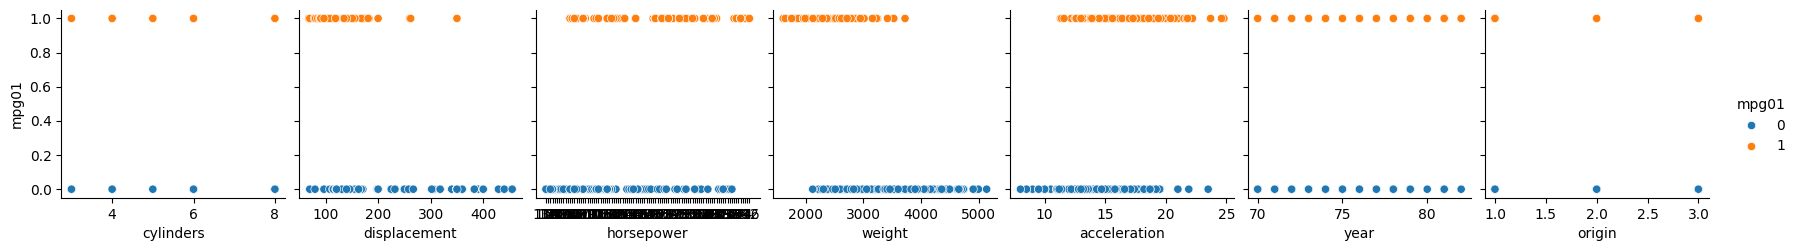

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to include in the scatterplot matrix
# excluding 'mpg', 'mpg01', and 'name'.
cols = [col for col in Auto.columns if col not in ['mpg', 'mpg01','name']]

# Create a scatterplot matrix
sns.pairplot(Auto, x_vars=cols, y_vars=['mpg01'], hue='mpg01')
plt.show()


From the scatterplot matrix, we see that weight seems to have a negative correlation with mpg01, while accelaration seems to have a postive correlation. Other variables are not as conclusive.

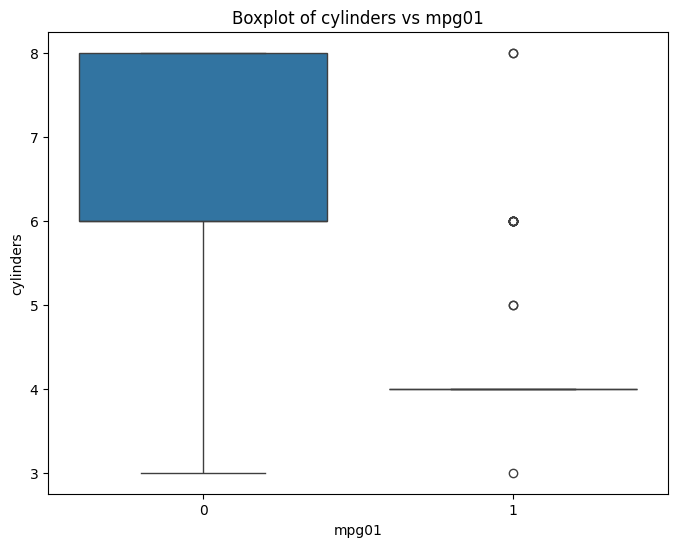

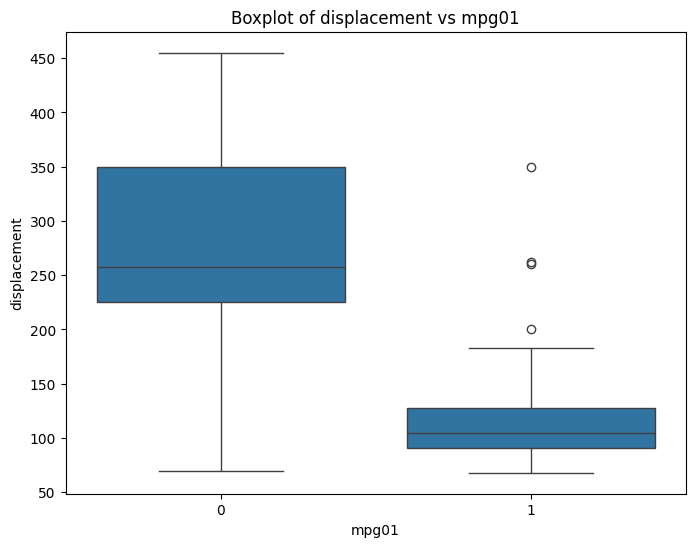

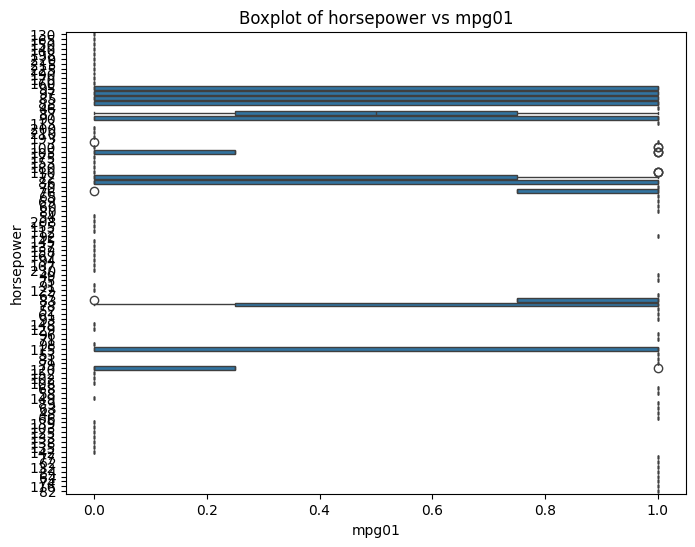

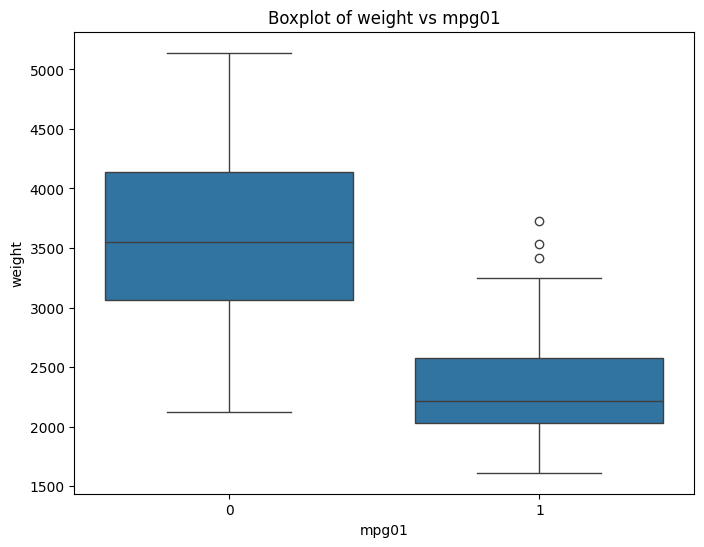

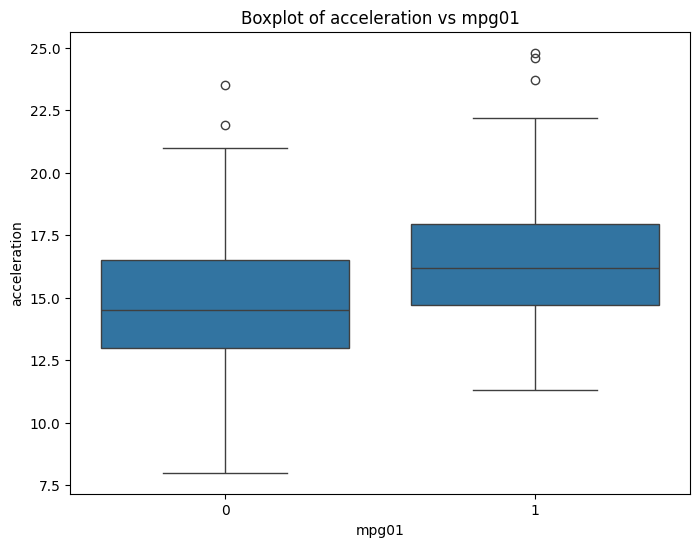

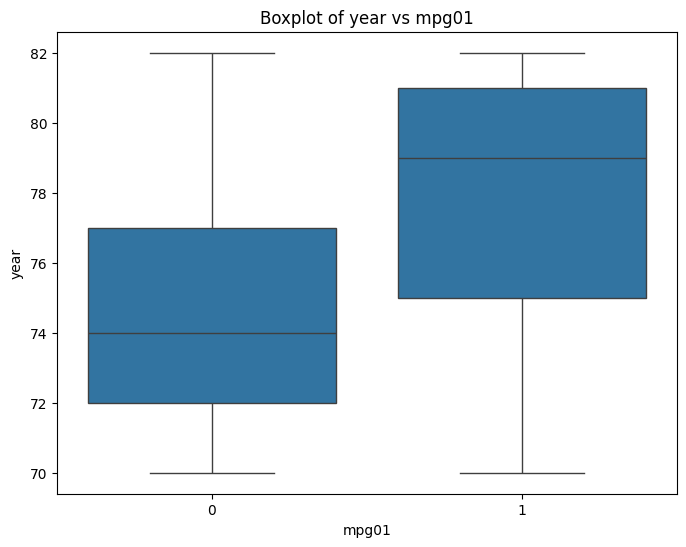

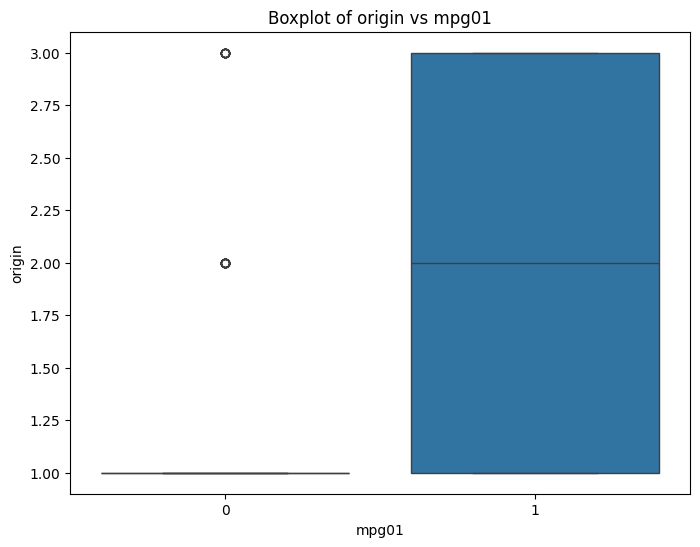

In [ ]:
# Create boxplots for each variable against mpg01
for col in Auto.columns:
  if col not in ['mpg', 'mpg01', 'name']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='mpg01', y=col, data=Auto)
    plt.title(f'Boxplot of {col} vs mpg01')
    plt.show()

From the boxplots, we also see that there is also considerable difference in the distribution of year and displacement in terms of mpg01.

We select 'acceleration', 'weight', 'displacement',and 'year' as our feature.

##(c) Split the data into a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = Auto[['acceleration','weight','displacement','year']]  # Use the features identified in part (b)
y = Auto['mpg01']

# Split data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (277, 4)
Testing data shape: (120, 4)


##(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y) using 'acceleration','weight','displacement','year'
X = Auto[['acceleration','weight','displacement','year']]
y = Auto['mpg01']

# Create and train the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, y_pred)

print(f"Test error of the LDA model: {test_error}")

Test error of the LDA model: 0.09999999999999998


##(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define features (X) and target variable (y)
X = Auto[['acceleration','weight','displacement','year']]
y = Auto['mpg01']

# Create and train the QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, y_pred)

print(f"Test error of the QDA model: {test_error}")

Test error of the QDA model: 0.125


##(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define features (X) and target variable (y)
X = Auto[['acceleration','weight','displacement','year']]
y = Auto['mpg01']

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, y_pred)

print(f"Test error of the logistic regression model: {test_error}")

Test error of the logistic regression model: 0.09166666666666667


##(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = Auto[['acceleration','weight','displacement','year']]
y = Auto['mpg01']

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, y_pred)

print(f"Test error of the Naive Bayes model: {test_error}")

Test error of the Naive Bayes model: 0.125


##(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define features (X) and target variable (y)
X = Auto[['acceleration','weight','displacement','year']]
y = Auto['mpg01']

# Define a list of K values to test
k_values = [1, 3, 5, 7, 9, 11]

# Loop through K values and calculate test errors
for k in k_values:
    # Create and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate the test error (1 - accuracy)
    test_error = 1 - accuracy_score(y_test, y_pred)

    print(f"Test error for KNN with K={k}: {test_error}")


Test error for KNN with K=1: 0.125
Test error for KNN with K=3: 0.14166666666666672
Test error for KNN with K=5: 0.15833333333333333
Test error for KNN with K=7: 0.15833333333333333
Test error for KNN with K=9: 0.16666666666666663
Test error for KNN with K=11: 0.17500000000000004


K=1 yields the best results

#Ch4_Q15:
15. This problem involves writing functions.

##(a)
Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results. *Hint: Recall that x**a raises x to the power a. Use the print() function to display the result.*

In [ ]:
def Power():
  print(2**3)

Power()

8


##(b)
Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x**a. You can do this by beginning your function with the line def Power2(x, a): You should be able to call your function by entering, for instance, Power2(3, 8) on the command line. This should output the value of 38, namely, 6, 561.

In [ ]:
def Power2(x, a):
  print(x**a, end='\n\n')

Power2(3, 8)

6561



##(c)
Using the Power2() function that you just wrote, compute $10^3$, $8^17$, and $131^3$.

In [ ]:
print('The answer to 10^3 is: ')
Power2(10, 3)
print('The answer to 8^17 is: ')
Power2(8, 17)
print('The answer to 131^3 is: ')
Power2(131, 3)

The answer to 10^3 is: 
1000

The answer to 8^17 is: 
2251799813685248

The answer to 131^3 is: 
2248091



##(d)
Now create a new function, Power3(), that actually returns the result x^a as a Python object, rather than simply printing it to the screen. That is, if you store the value x**a in an object called result within your function, then you can simply return return this result, using the following line: return result
Note that the line above should be the last line in your function, and it should be indented 4 spaces.

In [ ]:
def Power3(x, a):
  result = x**a
  return result

print('The answer to 10^3 is: ', Power3(10, 3))
print('The answer to 8^17 is: ', Power3(8, 17))
print('The answer to 131^3 is: ', Power3(131, 3))

The answer to 10^3 is:  1000
The answer to 8^17 is:  2251799813685248
The answer to 131^3 is:  2248091


##(e)
Now using the Power3() function, create a plot of $f(x) = x^2$. The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the fgure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the ax.set_xscale() and ax.set_yscale() methods of the axes you are plotting to.

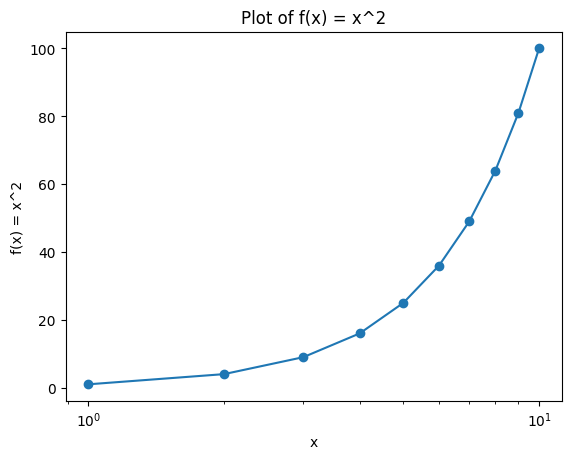

In [ ]:
import matplotlib.pyplot as plt

def Power3(x, a):
  result = x**a
  return result

# Generate x and y values
x_values = range(1, 11)
y_values = [Power3(x, 2) for x in x_values]

# Create the plot
fig, ax = plt.subplots()
ax.plot(x_values, y_values, marker='o', label=f'x^2')

# Customize the plot
ax.set_xlabel("x")
ax.set_ylabel("f(x) = x^2")
ax.set_title("Plot of f(x) = x^2")

# Set x-axis to log scale
ax.set_xscale('log')
plt.show()

##(f)
Create a function, PlotPower(), that allows you to create a plot of x against x**a for a fixed a and a sequence of values of x. For instance, if you call PlotPower(np.arange(1, 11), 3) then a plot should be created with an x-axis taking on values 1, 2,..., 10, and a y-axis taking on values $1^3, 2^3,..., 10^3$.

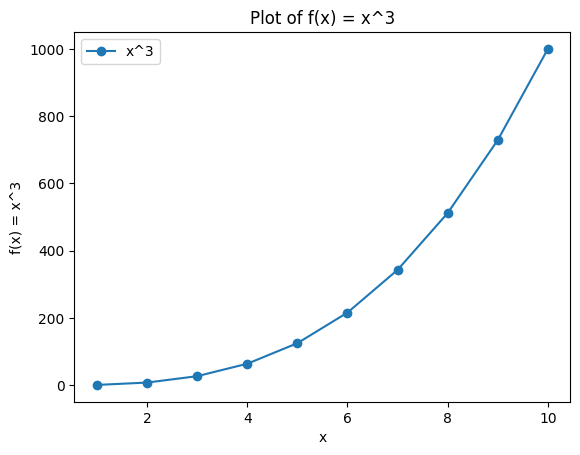

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def PlotPower(x_values, a):
    y_values = [Power3(x, a) for x in x_values]
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values, marker='o', label=f'x^{a}')
    ax.set_xlabel("x")
    ax.set_ylabel(f"f(x) = x^{a}")
    ax.set_title(f"Plot of f(x) = x^{a}")
    ax.legend()
    plt.show()

PlotPower(np.arange(1, 11), 3)